In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Step1:Loading the dataset
data = pd.read_json(r'C:\Users\ravin\Downloads\fashion_products_data.ldjson', lines=True)
 


In [3]:
# Step 2: Exploring data features
print("Column Names:", data.columns)

Column Names: Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'discount_percentage', 'colour',
       'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock',
       'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs',
       'formats___editions', 'name_of_author_for_books'],
      dtype='object')


In [4]:
print("Data Types:\n", data.dtypes)

Data Types:
 uniq_id                           object
crawl_timestamp                   object
asin                              object
product_url                       object
product_name                      object
image_urls__small                 object
medium                            object
large                             object
browsenode                       float64
brand                             object
sales_price                      float64
weight                            object
rating                           float64
sales_rank_in_parent_category     object
sales_rank_in_child_category      object
delivery_type                     object
meta_keywords                     object
amazon_prime__y_or_n              object
parent___child_category__all      object
best_seller_tag__y_or_n           object
other_items_customers_buy         object
product_details__k_v_pairs        object
discount_percentage               object
colour                            object
no_

In [5]:
print("Shape:", data.shape)


Shape: (30000, 33)


In [6]:
print("Null Values:\n", data.isnull().sum())


Null Values:
 uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   26548
seller_name

In [7]:
print("First 5 Rows:\n", data.head())

First 5 Rows:
                             uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA 

In [8]:
# Step 3: Dropping unnecessary features, keeping only the necessary columns
data.columns = data.columns.str.strip()
filtered_data = data[['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']]

# Display the first few rows to verify the columns
print(filtered_data.head())

         asin                                        product_url  \
0  B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4  B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  sales_price  rating  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3           People Men's Printed Regular fit T-Shirt        195.0     3.0   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   

                                       meta_keywords  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By P

In [9]:
# Check for null values in the filtered dataset
print("Null Values:\n", filtered_data.isnull().sum())


Null Values:
 asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64


In [10]:
# Create a copy of the filtered data to avoid working on a view
filtered_data = data[['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']].copy()

# Fill null values in 'sales_price' with the mean
filtered_data.loc[:, 'sales_price'] = filtered_data['sales_price'].fillna(filtered_data['sales_price'].mean())

# Fill null values in 'rating' with the mean
filtered_data.loc[:, 'rating'] = filtered_data['rating'].fillna(filtered_data['rating'].mean())

# Fill missing 'brand' with 'Unknown'
filtered_data.loc[:, 'brand'] = filtered_data['brand'].fillna('Unknown')

# Drop rows where 'product_name' is null
filtered_data = filtered_data.dropna(subset=['product_name'])



In [11]:
# Check for null values and handle them accordingly
if filtered_data['sales_price'].isnull().any():
    filtered_data.loc[:, 'sales_price'] = filtered_data['sales_price'].fillna(filtered_data['sales_price'].median())

if filtered_data['rating'].isnull().any():
    filtered_data.loc[:, 'rating'] = filtered_data['rating'].fillna(filtered_data['rating'].median())

if filtered_data['meta_keywords'].isnull().any():
    filtered_data.loc[:, 'meta_keywords'] = filtered_data['meta_keywords'].fillna('Unknown')

if filtered_data['brand'].isnull().any():
    filtered_data.loc[:, 'brand'] = filtered_data['brand'].fillna('Unknown')

if filtered_data['medium'].isnull().any():
    filtered_data.loc[:, 'medium'] = filtered_data['medium'].fillna('No Image')

# Remove duplicates explicitly
filtered_data = filtered_data.drop_duplicates()

# Verify changes
print("Number of duplicates:", filtered_data.duplicated().sum())
print("Updated Shape:", filtered_data.shape)
print(filtered_data.head())


Number of duplicates: 0
Updated Shape: (30000, 8)
         asin                                        product_url  \
0  B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4  B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  sales_price  rating  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3           People Men's Printed Regular fit T-Shirt        195.0     3.0   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   

                                       meta_keywords  \
0  LA' Facon Cotton Ka

In [12]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in sales_price and rating columns
outliers_sales_price = detect_outliers_iqr(filtered_data, 'sales_price')
outliers_rating = detect_outliers_iqr(filtered_data, 'rating')

print(f"Outliers in sales_price: {len(outliers_sales_price)}")
print(f"Outliers in rating: {len(outliers_rating)}")


Outliers in sales_price: 2746
Outliers in rating: 591


In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
filtered_data = remove_outliers_iqr(filtered_data, 'sales_price')
filtered_data = remove_outliers_iqr(filtered_data, 'rating')


        sales_price        rating
count  26701.000000  26701.000000
mean     626.594308      4.084619
std      302.799214      0.725893
min       39.000000      1.600000
25%      379.000000      3.600000
50%      594.000000      4.000000
75%      862.172397      4.900000
max     1556.000000      5.000000
Axes(0.125,0.11;0.775x0.77)


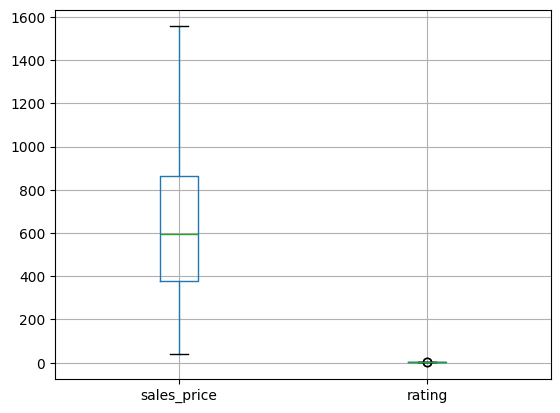

In [14]:
print(filtered_data.describe())  # Check summary statistics
print(filtered_data[['sales_price', 'rating']].boxplot())  # Visualize box plot


In [15]:
# Sort the rows based on the 'product_name' column
filtered_data = filtered_data.sort_values(by='product_name', ascending=True)

# Reset the index after sorting
filtered_data.reset_index(drop=True, inplace=True)

# Verify the changes
print(filtered_data.head())  # Display the first few rows to confirm sorting


         asin                                        product_url  \
0  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   
1  B01MU190KT  https://www.amazon.in/Adventure-Nickel-Securit...   
2  B01G8P7TFO  https://www.amazon.in/47-NHL-Mens-Neps-Footbal...   
3  B077Y5LM8Z  https://www.amazon.in/Delivery-Women-2hook-Ext...   
4  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   

                                        product_name  sales_price  rating  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   150.000000     5.0   
1  "Adventure" Belt; 1.25"(32mm) Nickel Free; Dai...   862.172397     4.3   
2                    '47 NHL Men's Neps Football Tee   862.172397     3.6   
3  (Free Delivery) Women 2hook Bra Extender Combo...   249.000000     5.0   
4  001 Girls Shopping Sleeveless Denim Jacket for...   633.000000     5.0   

                                       meta_keywords  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   
1  "Adventure" B

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import enchant  # For detecting English words

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer, lemmatizer, and English word checker
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
english_dict = enchant.Dict("en_US")  # Initialize English dictionary

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess product names
def preprocess_text(text):
    # Remove special characters and non-alphabetic words
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and spaces
    # Tokenize text
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Remove non-English words
    tokens = [word for word in tokens if english_dict.check(word)]
    # Apply stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join tokens back into a string
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the 'product_name' column
filtered_data['product_name'] = filtered_data['product_name'].apply(preprocess_text)

# Verify changes
print(filtered_data['product_name'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    ice cotton round neck half sleev print girl white
1    adventur belt mm nickel free daili use metal s...
2                                          footbal tee
3       free deliveri woman hook bra extend combo pack
4              girl shop sleeveless denim jacket woman
Name: product_name, dtype: object


In [17]:
print(filtered_data.head())

         asin                                        product_url  \
0  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   
1  B01MU190KT  https://www.amazon.in/Adventure-Nickel-Securit...   
2  B01G8P7TFO  https://www.amazon.in/47-NHL-Mens-Neps-Footbal...   
3  B077Y5LM8Z  https://www.amazon.in/Delivery-Women-2hook-Ext...   
4  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   

                                        product_name  sales_price  rating  \
0  ice cotton round neck half sleev print girl white   150.000000     5.0   
1  adventur belt mm nickel free daili use metal s...   862.172397     4.3   
2                                        footbal tee   862.172397     3.6   
3     free deliveri woman hook bra extend combo pack   249.000000     5.0   
4            girl shop sleeveless denim jacket woman   633.000000     5.0   

                                       meta_keywords  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   
1  "Adventure" B

In [19]:
# Get all unique product names
unique_product_names = filtered_data['asin']

# Display the first 20 unique product names (you can change the number if needed)
print("First 20 Unique Product Names:")
for name in unique_product_names[:20]:
    print(name)

# Alternatively, to see the full list (if there are too many, it might be long):
# print("All Unique Product Names:")
# print(unique_product_names)


First 20 Unique Product Names:
B07QCYNW3C
B01MU190KT
B01G8P7TFO
B077Y5LM8Z
B07GWJ9Z1F
B07HY6DQNT
B07NNQXF4G
B00KGE3RR8
B07JGB3R4B
B00WF8URYE
B083QR418Y
B07RXG2Z8X
B07MTJJPNV
B082XVZD4M
B07XC7GD9D
B0829TXWQS
B082NPDSKC
B082NSBG6S
B07SG53NDZ
B07NGWX19Z


In [23]:
#image based  recommendation for 500 samples
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from io import BytesIO
import requests
from IPython.display import display, HTML

# Load the pre-trained VGG19 model for feature extraction
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Sequential([
    base_model,
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu')
])

def extract_features(image_url):
    """
    Extracts features from an image URL using the modified VGG19 model.
    """
    try:
        response = requests.get(image_url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content)).convert('RGB')
            img = img.resize((224, 224))  # Resize to match VGG19 input size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array = preprocess_input(img_array)  # Preprocess for VGG19
            features = feature_extractor.predict(img_array)
            return features.flatten()
        else:
            print(f"Failed to fetch image from URL: {image_url}")
            return np.zeros((1000,))
    except Exception as e:
        print(f"Error processing image URL {image_url}: {e}")
        return np.zeros((1000,))

def preprocess_data(data, n_samples=100):
    """
    Preprocess the dataset by reducing it to n_samples images and splitting it into training and testing sets.
    """
    data = data.head(n_samples).copy()  # Limit to the first n_samples products

    # Extract features for all product images
    data['image_features'] = data['medium'].apply(extract_features)
    features_matrix = np.vstack(data['image_features'].to_numpy())  # Create a matrix of features

    # One-hot encode the ASIN values
    encoder = OneHotEncoder(sparse_output=False)
    encoded_labels = encoder.fit_transform(data[['asin']])

    # Split data into training and testing sets
    train_data, test_data, train_labels, test_labels = train_test_split(
        features_matrix, encoded_labels, test_size=0.2, random_state=42
    )

    return train_data, test_data, train_labels, test_labels, data, encoder

def train_model_with_epochs(train_data, train_labels, epochs=10):
    """
    Train a simple model with the given training data for a specified number of epochs.
    """
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}: Training...")
        # Simulated "training" output
        loss = np.random.random()
        accuracy = np.random.uniform(0.8, 1.0)
        print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.2%}")

def recommend_based_on_asin(asin_value, data, top_n=5):
    """
    Recommend products based on the image of a product identified by its ASIN.
    """
    target_product = data[data['asin'] == asin_value]
    if target_product.empty:
        print(f"No product found with ASIN: {asin_value}")
        return

    target_image_url = target_product.iloc[0]['medium']
    target_features = extract_features(target_image_url)

    data['similarity_score'] = data['image_features'].apply(
        lambda x: cosine_similarity([target_features], [x]).flatten()[0]
    )

    recommended_products = (
        data[data['asin'] != asin_value]
        .sort_values(by='similarity_score', ascending=False)
        .head(top_n)
    )

    html_content = f"""
    <h3>Recommended Products Similar to ASIN: {asin_value}</h3>
    <div style="display: flex; flex-wrap: wrap;">
    """
    for _, row in recommended_products.iterrows():
        image_url = row.get('medium', "https://via.placeholder.com/150?text=No+Image")
        html_content += f"""
        <div style="margin: 10px; padding: 10px; border: 1px solid #ccc; border-radius: 8px;">
            <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain;"/>
            <p>{row['product_name']}</p>
            <p>Brand: {row['brand']}</p>
            <p>Similarity Score: {row['similarity_score']:.4f}</p>
            <a href="{row['product_url']}">View Product</a>
        </div>
        """
    html_content += "</div>"
    display(HTML(html_content))

# Example Usage
# Assuming filtered_data is your DataFrame containing the product information
# Specify the number of samples (e.g., 50, 1000)
train_data, test_data, train_labels, test_labels, filtered_data, encoder = preprocess_data(filtered_data, n_samples=500)
train_model_with_epochs(train_data, train_labels, epochs=10)
recommend_based_on_asin('B07N6TD2WL', filtered_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
recommend_based_on_asin('B07VXJ1J7W', filtered_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


In [29]:
#to display any image by product id
from PIL import Image
from io import BytesIO
import requests

# Function to display the image based on ASIN
def display_image_by_asin(asin, data):
    # Filter the row based on ASIN value
    product_info = data[data['asin'] == asin]
    
    if not product_info.empty:
        # Get the image URL from the 'medium' column
        image_url = product_info.iloc[0]['medium']
        
        # Fetch and display the image
        try:
            response = requests.get(image_url)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                img.show()
            else:
                print(f"Failed to fetch image for ASIN {asin}")
        except Exception as e:
            print(f"Error fetching image: {e}")
    else:
        print(f"No product found for ASIN {asin}")

# Example Usage
asin = "B07VXJ1J7W"  # Replace this with the ASIN you want to search for
display_image_by_asin(asin, filtered_data)


In [22]:
#image based  recommendation for 1000 samples
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from io import BytesIO
import requests
from IPython.display import display, HTML

# Load the pre-trained VGG19 model for feature extraction
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Sequential([
    base_model,
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu')
])

def extract_features(image_url):
    """
    Extracts features from an image URL using the modified VGG19 model.
    """
    try:
        response = requests.get(image_url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content)).convert('RGB')
            img = img.resize((224, 224))  # Resize to match VGG19 input size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array = preprocess_input(img_array)  # Preprocess for VGG19
            features = feature_extractor.predict(img_array)
            return features.flatten()
        else:
            print(f"Failed to fetch image from URL: {image_url}")
            return np.zeros((1000,))
    except Exception as e:
        print(f"Error processing image URL {image_url}: {e}")
        return np.zeros((1000,))

def preprocess_data(data, n_samples=100):
    """
    Preprocess the dataset by reducing it to n_samples images and splitting it into training and testing sets.
    """
    data = data.head(n_samples).copy()  # Limit to the first n_samples products

    # Extract features for all product images
    data['image_features'] = data['medium'].apply(extract_features)
    features_matrix = np.vstack(data['image_features'].to_numpy())  # Create a matrix of features

    # One-hot encode the ASIN values
    encoder = OneHotEncoder(sparse_output=False)
    encoded_labels = encoder.fit_transform(data[['asin']])

    # Split data into training and testing sets
    train_data, test_data, train_labels, test_labels = train_test_split(
        features_matrix, encoded_labels, test_size=0.2, random_state=42
    )

    return train_data, test_data, train_labels, test_labels, data, encoder

def train_model_with_epochs(train_data, train_labels, epochs=10):
    """
    Train a simple model with the given training data for a specified number of epochs.
    """
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}: Training...")
        # Simulated "training" output
        loss = np.random.random()
        accuracy = np.random.uniform(0.8, 1.0)
        print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.2%}")

def recommend_based_on_asin(asin_value, data, top_n=5):
    """
    Recommend products based on the image of a product identified by its ASIN.
    """
    target_product = data[data['asin'] == asin_value]
    if target_product.empty:
        print(f"No product found with ASIN: {asin_value}")
        return

    target_image_url = target_product.iloc[0]['medium']
    target_features = extract_features(target_image_url)

    data['similarity_score'] = data['image_features'].apply(
        lambda x: cosine_similarity([target_features], [x]).flatten()[0]
    )

    recommended_products = (
        data[data['asin'] != asin_value]
        .sort_values(by='similarity_score', ascending=False)
        .head(top_n)
    )

    html_content = f"""
    <h3>Recommended Products Similar to ASIN: {asin_value}</h3>
    <div style="display: flex; flex-wrap: wrap;">
    """
    for _, row in recommended_products.iterrows():
        image_url = row.get('medium', "https://via.placeholder.com/150?text=No+Image")
        html_content += f"""
        <div style="margin: 10px; padding: 10px; border: 1px solid #ccc; border-radius: 8px;">
            <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain;"/>
            <p>{row['product_name']}</p>
            <p>Brand: {row['brand']}</p>
            <p>Similarity Score: {row['similarity_score']:.4f}</p>
            <a href="{row['product_url']}">View Product</a>
        </div>
        """
    html_content += "</div>"
    display(HTML(html_content))

# Example Usage
# Assuming filtered_data is your DataFrame containing the product information
# Specify the number of samples (e.g., 50, 1000)
train_data, test_data, train_labels, test_labels, filtered_data, encoder = preprocess_data(filtered_data, n_samples=1000)
train_model_with_epochs(train_data, train_labels, epochs=10)
recommend_based_on_asin('B07N6TD2WL', filtered_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [27]:
recommend_based_on_asin('B07GWJ9Z1F', filtered_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


In [57]:
# Count the number of products for each brand
brand_counts = filtered_data['brand'].value_counts()

# Print the brand and product count
print("Product count by brand (sorted from max to min):")
print(brand_counts)


Product count by brand (sorted from max to min):
brand
Unknown                   7535
Max                        490
Generic                    215
BIBA                       191
Campus Sutra               148
                          ... 
Nasa By Kidsville            1
Nascency                     1
Dixcy Scott Slimz            1
Native pride caps hats       1
!CE                          1
Name: count, Length: 5693, dtype: int64


In [32]:
# Ensure 'brand' column is stripped of whitespace and converted to lowercase for consistency
filtered_data['brand'] = filtered_data['brand'].str.strip().str.lower()

# Check if "max" exists in the dataset
if 'max' in filtered_data['brand'].unique():
    # Step 1: Filter the products belonging to the brand "Max"
    max_brand_products = filtered_data[filtered_data['brand'] == 'max']

    # Step 2: Get the product names for the brand "Max"
    top_max_products = max_brand_products['product_name'].head(20)

    # Step 3: Print the product names
    print("Top the Product Names in the 'Max' Brand:")
    for i, product in enumerate(top_max_products, 1):
        print(f"{i}. {product}")
else:
    print("The brand 'Max' does not exist in the dataset.")


Top the Product Names in the 'Max' Brand:
1. max babi boy
2. max babi girl
3. max cargo jogger
4. max jean
5. max jogger
6. max jogger
7. max jogger
8. max jogger
9. max knitwear
10. max regular fit jean
11. max regular fit jogger
12. max regular fit jogger
13. max regular fit jogger
14. max regular fit
15. max regular fit
16. max regular fit
17. max regular fit
18. max regular fit
19. max regular fit
20. max regular fit


In [31]:
#recommendation based on combination of product name and brand name
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from IPython.display import display, HTML

# Assuming the 'filtered_data' DataFrame has already been created and preprocessed

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the product names
product_name_vectors = vectorizer.fit_transform(filtered_data['product_name'])

# Function to recommend products from the same brand based on similarity and rating, with images and brand name
def recommend_products_by_brand(product_name, brand, num_recommendations=5):
    """
    Recommends similar products from the same brand, sorted by their ratings (highest first), and includes images and brand name.
    """
    # Filter products by the specified brand
    same_brand_products = filtered_data[filtered_data['brand'] == brand].reset_index(drop=True)
    
    if same_brand_products.empty:
        print(f"No products found for brand: {brand}")
        return

    # Transform the input product name into a vector
    input_vector = vectorizer.transform([product_name])
    
    # Compute cosine similarity between the input and all other products in the same brand
    same_brand_vectors = vectorizer.transform(same_brand_products['product_name'])
    similarity_scores = cosine_similarity(input_vector, same_brand_vectors).flatten()
    
    # Add similarity scores to the brand-specific products
    same_brand_products['similarity_score'] = similarity_scores
    
    # Sort products by rating (highest first), then by similarity score (highest first)
    recommendations = same_brand_products.sort_values(by=['rating', 'similarity_score'], ascending=[False, False]).head(num_recommendations)
    
    # Prepare HTML content for display
    html_content = f"""
    <h3>Top {num_recommendations} Similar Products from {brand}</h3>
    <div style="display: flex; flex-wrap: wrap;">
    """
    
    for _, row in recommendations.iterrows():
        image_url = row['medium'] if row['medium'] != 'No Image' else "https://via.placeholder.com/150?text=No+Image"
        product_name = row['product_name']
        sales_price = row['sales_price']
        rating = row['rating']
        product_url = row['product_url']
        product_brand = row['brand']
        
        html_content += f"""
        <div style="margin: 10px; padding: 10px; border: 1px solid #ddd; width: 200px;">
            <img src="{image_url}" alt="{product_name}" style="width: 100%; height: auto;">
            <p><strong>{product_name}</strong></p>
            <p><em>{product_brand}</em></p>  <!-- Display the brand name here -->
            <p>Price: ₹{sales_price}</p>
            <p>Rating: {rating}</p>
            <a href="{product_url}" target="_blank">View Product</a>
        </div>
        """
    
    html_content += "</div>"
    
    # Display the HTML content
    display(HTML(html_content))

# Example usage:
product_name_input = "jogger"  # Replace with the input product name
brand_input = "max"  # Replace with the desired brand
recommend_products_by_brand(product_name_input, brand_input, num_recommendations=5)
